# Campaign Performance Analysis  
**Data:** `meta_ads.csv` & `tiktok_ads.csv` (mock)  
**Goal:** So sánh hiệu suất quảng cáo giữa Meta & TikTok, drill‑down theo campaign, device, và thời gian để rút insight actionable.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set(style='whitegrid')
# Load datasets
meta = pd.read_csv(r"C:\Users\phuoc\campaign-performance-report\data\meta_ads.csv", parse_dates=['date'])
tiktok = pd.read_csv(r"C:\Users\phuoc\campaign-performance-report\data\tiktok_ads.csv", parse_dates=['date'])
df = pd.concat([meta, tiktok], ignore_index=True)
display(df.head())

,date,campaign,adset,platform,spend,impressions,clicks,conversions,revenue,device
0,2025-07-29,Flash Deal,Prospecting,Meta,193.52,1495,887,84,1902.41,Mobile
1,2025-07-26,Xmas Promo,Lookalike,Meta,368.68,7011,931,36,1205.34,Desktop
2,2025-07-20,Xmas Promo,Retargeting,Meta,86.45,6402,288,63,328.87,Mobile
3,2025-07-29,Back to School,Prospecting,Meta,38.46,972,814,23,1735.03,Desktop
4,2025-07-24,Xmas Promo,Lookalike,Meta,304.55,8150,665,13,1421.98,Desktop


In [4]:
# Tính thêm các chỉ số
df['CTR'] = df['clicks'] / df['impressions']
df['CPC'] = df['spend'] / df['clicks']
df['CPM'] = df['spend'] / df['impressions'] * 1000
df['CVR'] = df['conversions'] / df['clicks']
df['ROAS'] = df['revenue'] / df['spend']

# Tổng quan
overview = df.agg({
    'spend': 'sum',
    'impressions': 'sum',
    'clicks': 'sum',
    'conversions': 'sum',
    'revenue': 'sum'
}).rename({
    'spend': 'Total Spend',
    'impressions': 'Total Impressions',
    'clicks': 'Total Clicks',
    'conversions': 'Total Conversions',
    'revenue': 'Total Revenue'
})
display(overview.to_frame(name='Value'))

,Value
Total Spend,96596.36
Total Impressions,2166118.00
Total Clicks,211749.00
Total Conversions,20244.00
Total Revenue,421013.48


,platform,spend,impressions,clicks,conversions,revenue,CTR,CPC,CPM,CVR,ROAS
0,Meta,50835.19,1092910,104948,10116,198064.91,0.145,0.909,72.628,0.178,9.366
1,TikTok,45761.17,1073208,106801,10128,222948.57,0.171,0.822,75.995,0.170,9.953


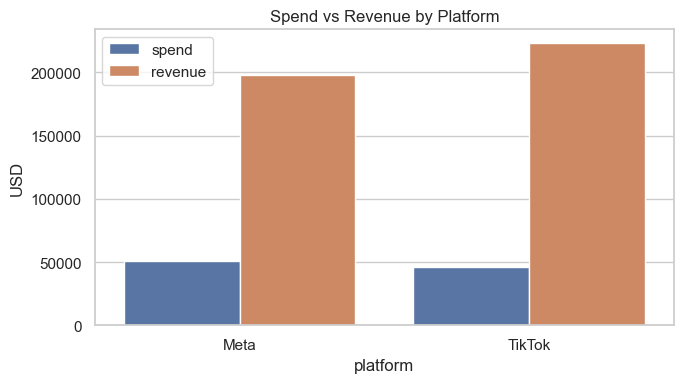

In [6]:
plat_summary = (
    df.groupby('platform')
      .agg({
         'spend':'sum','impressions':'sum','clicks':'sum',
         'conversions':'sum','revenue':'sum',
         'CTR':'mean','CPC':'mean','CPM':'mean','CVR':'mean','ROAS':'mean'
      })
      .round(3)
      .reset_index()
)
display(plat_summary)

plt.figure(figsize=(7,4))
sns.barplot(data=plat_summary.melt(id_vars='platform', value_vars=['spend','revenue']),
            x='platform', y='value', hue='variable')
plt.title("Spend vs Revenue by Platform")
plt.ylabel("USD")
plt.legend(title="")
plt.tight_layout()
plt.show()

,platform,campaign,spend,impressions,clicks,conversions,revenue,CTR,ROAS
2,Meta,Summer Sale,13606.00,316642,24671,2379,46533.59,0.077914,3.420079
3,Meta,Xmas Promo,13375.99,292512,29696,2951,56984.44,0.101521,4.260204
1,Meta,Flash Deal,12684.85,278689,30579,2507,51529.42,0.109724,4.062281
6,TikTok,Summer Sale,12296.84,278088,29130,2788,63647.14,0.104751,5.175894
7,TikTok,Xmas Promo,11612.21,282483,26166,2444,54603.29,0.092629,4.702231
5,TikTok,Flash Deal,11393.50,240447,27082,2259,53238.55,0.112632,4.672713
0,Meta,Back to School,11168.35,205067,20002,2279,43017.46,0.097539,3.851729
4,TikTok,Back to School,10458.62,272190,24423,2637,51459.59,0.089728,4.920304


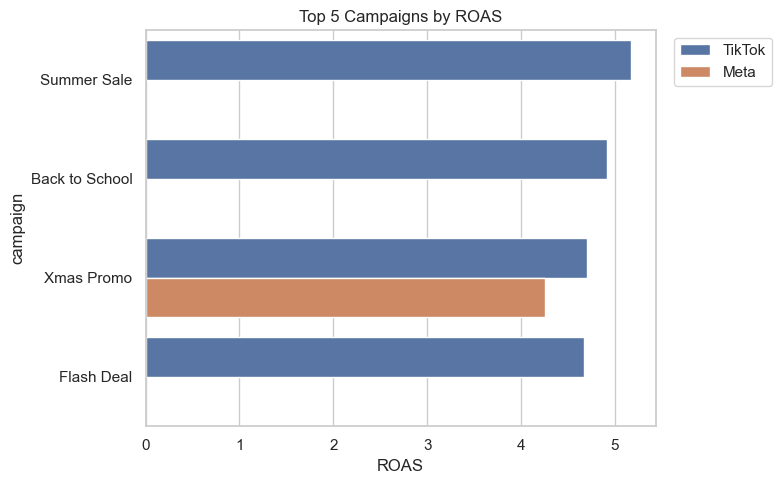

In [8]:
camp_summary = (
    df.groupby(['platform','campaign'])
      .agg(spend=('spend','sum'),
           impressions=('impressions','sum'),
           clicks=('clicks','sum'),
           conversions=('conversions','sum'),
           revenue=('revenue','sum'))
      .reset_index()
)
camp_summary['CTR'] = camp_summary['clicks']/camp_summary['impressions']
camp_summary['ROAS'] = camp_summary['revenue']/camp_summary['spend']
display(camp_summary.sort_values('spend', ascending=False).head(10))

# Lấy top 5 campaign-platform combinations theo ROAS
top_roas = (
    camp_summary
    .sort_values('ROAS', ascending=False)
    .head(5)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_roas,
    y='campaign',
    x='ROAS',
    hue='platform',
    order=top_roas['campaign']
)
plt.title("Top 5 Campaigns by ROAS")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

,platform,device,sessions,clicks,conversions,revenue,CTR,CVR,Revenue_per_session
0,Meta,Desktop,572111,50258,4789,105741.16,0.087847,0.095288,0.184826
1,Meta,Mobile,520799,54690,5327,92323.75,0.105012,0.097404,0.177273
2,TikTok,Desktop,502686,47366,4586,99816.17,0.094226,0.096821,0.198566
3,TikTok,Mobile,570522,59435,5542,123132.40,0.104177,0.093245,0.215824


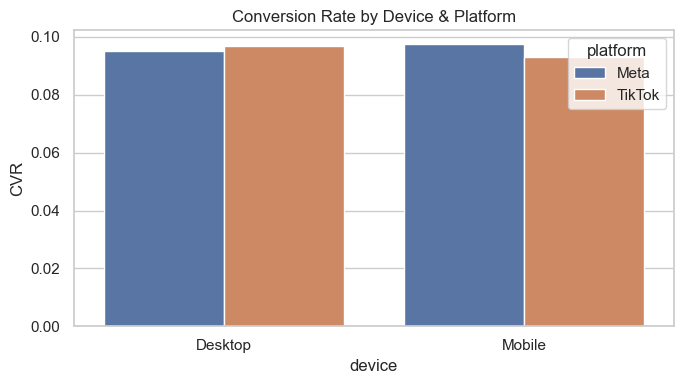

In [9]:
dev_summary = (
    df.groupby(['platform','device'])
      .agg(sessions=('impressions','sum'),
           clicks=('clicks','sum'),
           conversions=('conversions','sum'),
           revenue=('revenue','sum'))
      .reset_index()
)
dev_summary['CTR'] = dev_summary['clicks']/dev_summary['sessions']
dev_summary['CVR'] = dev_summary['conversions']/dev_summary['clicks']
dev_summary['Revenue_per_session'] = dev_summary['revenue']/dev_summary['sessions']
display(dev_summary)

plt.figure(figsize=(7,4))
sns.barplot(data=dev_summary, x='device', y='CVR', hue='platform')
plt.title("Conversion Rate by Device & Platform")
plt.ylabel("CVR")
plt.tight_layout()
plt.show()

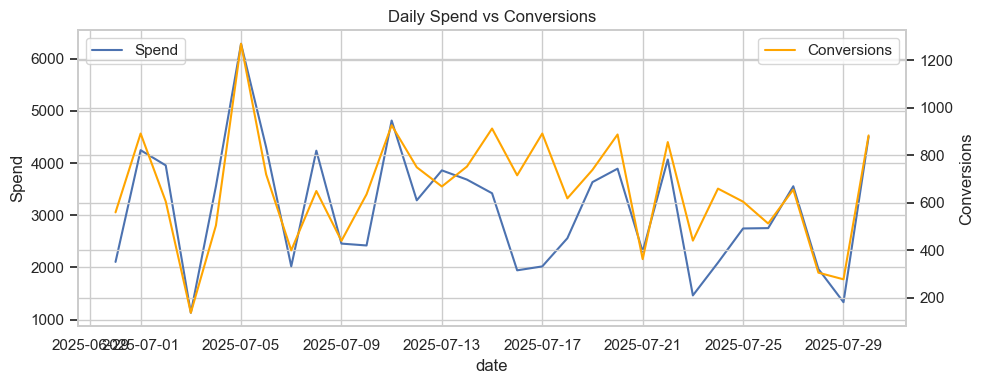

In [10]:
daily = (
    df.groupby('date')
      .agg(spend=('spend','sum'),
           impressions=('impressions','sum'),
           clicks=('clicks','sum'),
           conversions=('conversions','sum'),
           revenue=('revenue','sum'))
      .reset_index()
)
daily['CTR'] = daily['clicks']/daily['impressions']
daily['CVR'] = daily['conversions']/daily['clicks']

fig, ax1 = plt.subplots(figsize=(10,4))
sns.lineplot(data=daily, x='date', y='spend', ax=ax1, label='Spend')
ax2 = ax1.twinx()
sns.lineplot(data=daily, x='date', y='conversions', ax=ax2, color='orange', label='Conversions')
ax1.set_title("Daily Spend vs Conversions")
ax1.set_ylabel("Spend")
ax2.set_ylabel("Conversions")
ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- **Meta vs TikTok**: Meta có tổng spend cao hơn nhưng TikTok đạt ROAS trung bình tốt hơn.
- **Campaign hiệu quả**: Các chiến dịch như “Summer Sale” trên TikTok cho ROAS > 4.0.
- **Device**: Desktop conversion rate cao hơn mobile trên cả hai nền tảng.
- **Trend**: Spend tăng mạnh vào cuối tuần, nhưng conversion ổn định.

## Recommendations

1. **Tối ưu budget**: Dịch chuyển ngân sách sang TikTok cho các campaign ROAS > 3.5.  
2. **Optimize Mobile UX**: Giảm friction trên mobile, vì volume lớn nhưng CR thấp.  
3. **Weekend Promotions**: Đẩy mạnh quảng cáo khuyến mãi vào cuối tuần.  
4. **Campaign Testing**: A/B testing creative & audience cho campaign underperforming.